In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
credits = pd.read_csv('D:\\pj3\\tmdb_5000_credits.csv')
movies = pd.read_csv('D:\\pj3\\tmdb_5000_movies.csv') 

In [4]:
movies.head(2) 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
credits.head(2)  

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
credits1 = credits.drop(['title'] , axis=1)

In [7]:
credits1.head()

,movie_id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movie_merge = pd.merge(movies, credits1, left_on='id', right_on='movie_id') # 若两个DataFrame的基准列的名称不一致,则用left_on, right_on指定

In [9]:
movie_merge.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
movie_merge.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
movie_id                False
cast                    False
crew                    False
dtype: bool

# 填补数据

上映时间填补

In [11]:
movie_merge.loc[movie_merge['release_date'].isnull()==True]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,0.0,[],Released,NaN,America Is Still the Place,0.0,0,380097,[],[]


In [12]:
movie_merge['release_date'] = movie_merge['release_date'].fillna('2014/6/1')

电影时长填补

In [13]:
movie_merge.loc[movie_merge['runtime'].isnull()==True]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,370980,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,459488,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [14]:
movie_merge['runtime'] = movie_merge['runtime'].fillna(94, limit=1)#limit=1，限制每次只填补一个值
movie_merge['runtime'] = movie_merge['runtime'].fillna(240, limit=1)

# 时间变量

In [15]:
movie_merge['release_date'] = pd.to_datetime(movie_merge['release_date']).apply(lambda x: x.year)
movie_merge['release_date'].head(2)

0    2009
1    2007
Name: release_date, dtype: int64

# 解析数据

JSON(JavaScript Object Notation, JS 对象标记) 是一种轻量级的数据交换格式。JSON的数据格式其实就是python里面的字典格式，里面可以包含方括号括起来的数组，也就是python里面的列表。

genres,keywords,production_companies,production_countries,cast,crew列为json类型需要解析json数据，  
分两步：1. json本身为字符串类型，先转换为字典列表   2. 再将字典列表转换为，以'|'分割的字符串定义一个json类型的列名列表


In [16]:
import json

In [17]:
json_column = ['genres','keywords','production_companies','production_countries','cast','crew']

json.dumps(): 对数据进行编码。
json.loads(): 对数据进行解码。

In [18]:
for column in json_column:
    movie_merge[column]=movie_merge[column].map(json.loads)
    #movie_merge[column]=movie_merge[column].apply(json.loads)

In [19]:
movie_merge['genres'].head(2)

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
Name: genres, dtype: object

In [20]:
movie_merge['keywords'].head(2)#解码为字典列表

0    [{'id': 1463, 'name': 'culture clash'}, {'id':...
1    [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...
Name: keywords, dtype: object

In [21]:
movie_merge['production_companies'].head(2)

0    [{'name': 'Ingenious Film Partners', 'id': 289...
1    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
Name: production_companies, dtype: object

In [22]:
movie_merge['production_countries'].head(2)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [23]:
movie_merge['cast'].head(2)

0    [{'cast_id': 242, 'character': 'Jake Sully', '...
1    [{'cast_id': 4, 'character': 'Captain Jack Spa...
Name: cast, dtype: object

In [24]:
movie_merge['crew'].head(2)

0    [{'credit_id': '52fe48009251416c750aca23', 'de...
1    [{'credit_id': '52fe4232c3a36847f800b579', 'de...
Name: crew, dtype: object

In [25]:
def getname(x):
    list = []
    for i in x:
        list.append(i['name'])
    return '|'.join(list)

对genres,keywords,production_companies,production_countries列执行函数

In [26]:
for column in json_column[0:4]:
    movie_merge[column] = movie_merge[column].map(getname)

In [27]:
movie_merge['genres'].head(2)

0    Action|Adventure|Fantasy|Science Fiction
1                    Adventure|Fantasy|Action
Name: genres, dtype: object

cast只需提取前三个主演即可

In [28]:
def getactor(x):
    list = []
    for i in x:
        list.append(i['name'])
    return '|'.join(list[0:3])

In [29]:
movie_merge['cast'] = movie_merge['cast'].map(getactor)

In [30]:
movie_merge['cast'].head(2)

0    Sam Worthington|Zoe Saldana|Sigourney Weaver
1       Johnny Depp|Orlando Bloom|Keira Knightley
Name: cast, dtype: object

crew提取导演


In [31]:
def getdirector(x):
    list = []
    for i in x:
        if i['job'] == "Director" :
            list.append(i['name'])
    return '|'.join(list)

In [32]:
movie_merge['crew'] = movie_merge['crew'].map(getdirector)

In [33]:
movie_merge['crew'].head(2)

0     James Cameron
1    Gore Verbinski
Name: crew, dtype: object

重命名，并剔除冗余变量

In [34]:
rename_dict = {'release_date':'year','cast':'actor','crew':'director'}
movie_merge.rename(columns=rename_dict, inplace=True)

In [35]:
movie_merge.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,actor,director
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Sam Worthington|Zoe Saldana|Sigourney Weaver,James Cameron
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Johnny Depp|Orlando Bloom|Keira Knightley,Gore Verbinski


In [36]:
movie_merge.drop(['homepage','original_title','status','movie_id'],axis=1,inplace=True)  

In [37]:
original = movie_merge.copy() #原始数据备份

# 统计词频的函数

In [38]:
def count_word(df,ref_col,liste):
    keyword_count = dict()
    for s in liste:keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords):continue
        for s in [s for s in liste_keywords if s in liste]:
            if pd.notnull(s):keyword_count[s] += 1
    keywords_occurences = []
    for k, v in keyword_count.items():
         keywords_occurences.append([k, v])
    keywords_occurences.sort(key = lambda x : x[1], reverse = True)
    return  keywords_occurences,keyword_count

# 风格类型的向量化genre

提取所有电影的类型

In [39]:
genres_set = set()  
for x in movie_merge['genres']:  
    genres_set.update(x.split('|'))  
genres_set     #共二十种  

{'',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [40]:
genres_set .remove('')#删除空

In [41]:
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

集合add方法：是把要传入的元素做为一个整个添加到集合中  
集合update方法：是把要传入的元素拆分，做为个体传入到集合中，  
集合删除操作方法：remove

统计频率

In [42]:
genres_occurences, dum = count_word(movie_merge,'genres',genres_set )
genres_occurences[0: 5]

[['Drama', 2297],
 ['Comedy', 1722],
 ['Thriller', 1274],
 ['Action', 1154],
 ['Romance', 894]]

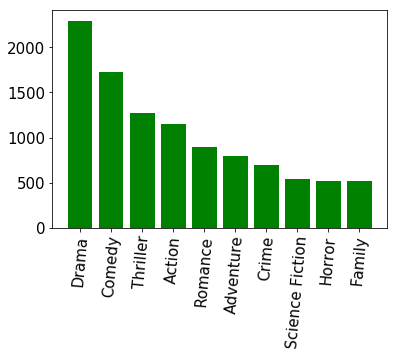

In [43]:
genres_occurences1 = genres_occurences[0:10]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
y_axis = [i[1] for i in genres_occurences1]
x_axis = [k for k,i in enumerate(genres_occurences1)]
x_label = [i[0] for i in genres_occurences1]
plt.xticks(rotation = 85, fontsize = 15)
plt.yticks( fontsize = 15)
plt.xticks(x_axis ,x_label)
ax1.bar(x_axis, y_axis, align = 'center',color = 'g')
plt.show()

对电影类型进行one-hot编码

genre_onehot = pd.DataFrame()  # 创建空的数据框
for genre in genres_set:    #如果一个值中包含特定内容，则编码为1，否则编码为0    
    genre_onehot[genre] = movie_merge['genres'].str.contains(genre).map(lambda x:1 if x else 0)

genre_onehot.loc[0]

In [44]:
def binary(genre_list):
    binaryList = []
    for genre in genres_set:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

Series.str.contains（pat，case = True，flags = 0，na = nan，regex = True ）  
测试模式或正则表达式是否包含在系列或索引的字符串中。  
返回布尔值系列或索引，具体取决于给定模式或正则表达式是否包含在系列或索引的字符串中。

In [45]:
movie_merge['genre_vec'] = movie_merge['genres'].map(lambda x: binary(x))

In [46]:
movie_merge['genre_vec'][0]#与之前画的dataframe一样

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [47]:
movie_merge.head(2)

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,year,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,actor,director,genre_vec
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington|Zoe Saldana|Sigourney Weaver,James Cameron,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, ..."
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp|Orlando Bloom|Keira Knightley,Gore Verbinski,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, ..."


# director导演向量化

提取所有电影的导演

In [48]:
director_set = set()  
for x in movie_merge['director']:  
    director_set.update(x.split('|'))  
director_set.remove('')#删除空     #有的电影导演不止一个，所以不能直接用add 
director_set
#len(director_set)  #共2578个导演

{'John Erick Dowdle',
 'Ang Lee',
 'Robert Iscove',
 'Marcus Dunstan',
 'Jonathan Kaplan',
 'Brett Piper',
 'Gene Quintano',
 'Todd Haynes',
 'Vicky Jenson',
 'Brad Peyton',
 'Vic Sarin',
 'Alan Parker',
 'Trevor Matthews',
 'Willard Huyck',
 'Ric Roman Waugh',
 'Manuel Marín',
 'Rick Friedberg',
 'Kasi Lemmons',
 'Charlie Kaufman',
 'Lukas Moodysson',
 'Julian Gilbey',
 'Gary Ross',
 'John Cameron Mitchell',
 'Karen Moncrieff',
 'Jason Reitman',
 'Clay Kaytis',
 'Phil Claydon',
 'Marius Markevicius',
 'John Singleton',
 'John Sayles',
 'John Moore',
 'Pan Nalin',
 'Robert Fontaine',
 'Tony Maylam',
 'Arthur Qwak',
 'Na Hong-jin',
 'Roland Emmerich',
 'Joseph Sargent',
 'Allison Burnett',
 'Kunihiko Yuyama',
 'Damien Chazelle',
 'Dan Harris',
 'Jean-Luc Godard',
 'Cody Cameron',
 'Jon Gunn',
 'Richard Ayoade',
 'Harald Reinl',
 'Frank Marshall',
 'Scott Stewart',
 'Daniel Taplitz',
 'James L. Brooks',
 'Mike Gabriel',
 'David Zucker',
 'Nobuhiro Suwa',
 'Peter Kosminsky',
 'Kenneth Lon


统计频率

In [49]:
director_occurences, dum = count_word(movie_merge,'director',director_set )
director_occurences[0: 5]

[['Steven Spielberg', 27],
 ['Woody Allen', 22],
 ['Martin Scorsese', 21],
 ['Clint Eastwood', 20],
 ['Robert Rodriguez', 17]]

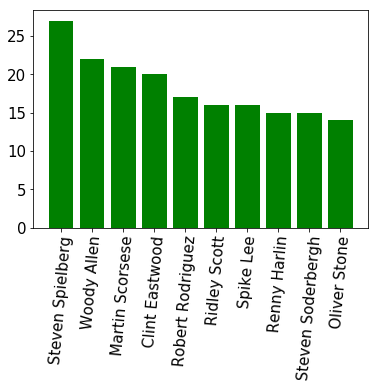

In [50]:
director_occurences1 = director_occurences[0:10]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
y_axis = [i[1] for i in director_occurences1]
x_axis = [k for k,i in enumerate(director_occurences1)]
x_label = [i[0] for i in director_occurences1]
plt.xticks(rotation = 85, fontsize = 15)
plt.yticks( fontsize = 15)
plt.xticks(x_axis ,x_label)
ax1.bar(x_axis, y_axis, align = 'center',color = 'g')
plt.show()

In [51]:
def binary1(director_list):
    binaryList = []
    for director in director_set:
        if director in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [52]:
movie_merge['director_vec'] = movie_merge['director'].map(lambda x: binary1(x))   #向量长度有点长，会不会太过稀疏了

# actor演员向量化——每个电影取了前三个

In [53]:
actor_set = set()  
for x in movie_merge['actor']:  
    actor_set.update(x.split('|'))  
actor_set.remove('')#删除空     #有的电影导演不止一个，所以不能直接用add 
actor_set
#len(actor_set)  #共5687个演员  #而且没有按照重要程度排序

{'Terry Kiser',
 'David Bowe',
 'Tong Dawei',
 "Alex O'Loughlin",
 'Doris Brent',
 'Jordan Brower',
 'Sara Lazzaro',
 'Thomas Horn',
 'Peter Coyote',
 'Jamie Chung',
 'Karan Sharma',
 'Kay Panabaker',
 'Barbara Ehrenreich',
 'Dominic Cooper',
 'Michael Collins',
 'Natasha Gregson Wagner',
 'Lazar Ristovski',
 'Sherri Eakin',
 'Rima Te Wiata',
 'Charles Berling',
 'Reeve Carney',
 'Alexandre Rodrigues',
 'Patrick Stewart',
 'Sun Honglei',
 'Nestor Carbonell',
 'Kathryn Harrold',
 'Christian Vazquez',
 'Blythe Auffarth',
 'Amy Smart',
 'Ella Joyce',
 'Bob Papenbrook',
 'Eric Artell',
 'Danny Trejo',
 'Cary-Hiroyuki Tagawa',
 'Emmanuelle Riva',
 'Hayley Orrantia',
 'Kate Dickie',
 'Pamela Reed',
 'Kelsey Grammer',
 'Guillaume Baché',
 'Amber Marie Bollinger',
 'Itzhak Perlman',
 'Ethan Embry',
 'Emily Watson',
 'January Jones',
 'Sylvia Miles',
 'Toby Kebbell',
 'Tim Robbins',
 'Annalee Jefferies',
 'Anne-Marie Loop',
 'Daren Kagasoff',
 'Gloria Votsis',
 'Andrew Bujalski',
 'Adam Sandler


统计频率

In [54]:
actor_occurences, dum = count_word(movie_merge,'actor',actor_set )
actor_occurences[0: 5]

[['Robert De Niro', 46],
 ['Samuel L. Jackson', 35],
 ['Bruce Willis', 35],
 ['Matt Damon', 35],
 ['Nicolas Cage', 34]]

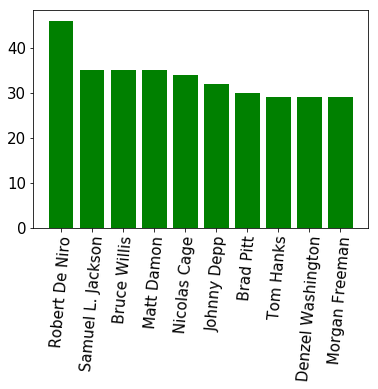

In [55]:
actor_occurences1 = actor_occurences[0:10]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
y_axis = [i[1] for i in actor_occurences1]
x_axis = [k for k,i in enumerate(actor_occurences1)]
x_label = [i[0] for i in actor_occurences1]
plt.xticks(rotation = 85, fontsize = 15)
plt.yticks( fontsize = 15)
plt.xticks(x_axis ,x_label)
ax1.bar(x_axis, y_axis, align = 'center',color = 'g')
plt.show()

In [56]:
def binary2(actor_list):
    binaryList = []
    for actor in actor_set:
        if actor in actor_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList 

In [57]:
movie_merge['actor_vec'] = movie_merge['actor'].map(lambda x: binary2(x))   #向量长度更加长了，会不会太过稀疏了

# keywords 处理

In [58]:
movie_merge['keywords'][0]

'culture clash|future|space war|space colony|society|space travel|futuristic|romance|space|alien|tribe|alien planet|cgi|marine|soldier|battle|love affair|anti war|power relations|mind and soul|3d'

In [59]:
keywords_set = set()  
for x in movie_merge['keywords']:  
    keywords_set.update(x.split('|'))  
keywords_set.remove('')#删除空    
keywords_set
liste = len(keywords_set)#9813

统计关键词词频

In [60]:
keyword_occurences, dum = count_word(movie_merge,'keywords',keywords_set )
keyword_occurences[0: 5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189]]

关键词展示：词云

In [61]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

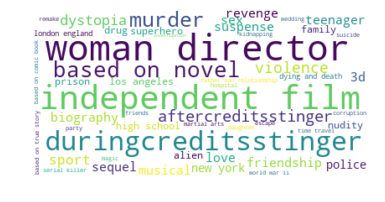

In [64]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]]= s[1]
wordcloud = WordCloud(background_color="white", max_words=2000,contour_width=3, contour_color='steelblue')
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation = 'bilinear')
ax1.axis('off')

## 关键词个数实在太多了，进一步处理

同义词替换，出现频率小，在不同的电影出现少

In [65]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

In [66]:
def keywords_inventory(dataframe,colonne = 'keywords'):
    PS = PorterStemmer()
    keywords_roots = dict()
    keywords_select = dict()
    category_keys = []
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s):continue
        for t in s.split('|'):
            t = t.lower()       #全部转化为小写字母
            racine = PS.stem(t) #所有都转化为词根
            if racine in keywords_roots:
                keywords_roots[racine].add(t)#相当于计算频数
            else:
                keywords_roots[racine] = {t}
                
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)    #选择同义词长度最短的
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
    print("Nb of keywords in variable'{}':{}".format(colonne,len(category_keys))) 
    return category_keys, keywords_roots, keywords_select 

In [67]:
keywords, keywords_roots, keywords_select = keywords_inventory(movie_merge,colonne = 'keywords')

Nb of keywords in variable'keywords':9474


筛选

In [68]:
import nltk
nltk.download()
from nltk.corpus import wordnet

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [69]:
import nltk.data
from nltk.corpus import stopwords
from nltk.corpus import wordnet

关键词出现5词以上留下来，否则去掉

In [70]:
def get_synonymes(mot_cle):
    lemma = set()
    for ss in wordnet.synsets(mot_cle):
        for w in ss.lemma_names():
            index = ss.name().find('.')+1
            if ss.name()[index] == 'n':lemma.add(w.lower().replace('_',' '))
    return lemma

In [71]:
mot_cle = 'alien'
lemma = get_synonymes(mot_cle)
for s in lemma:
    print('"{:<30}" in keywords list -> {} {}'.format(s, s in keywords,
                                                     dum[s] if s in keywords else 0))

"extraterrestrial              " in keywords list -> True 4
"noncitizen                    " in keywords list -> False 0
"outlander                     " in keywords list -> False 0
"stranger                      " in keywords list -> True 7
"unknown                       " in keywords list -> False 0
"extraterrestrial being        " in keywords list -> False 0
"alien                         " in keywords list -> True 76
"foreigner                     " in keywords list -> False 0


In [72]:
def test_keyword(mot, key_count, threshold):
    return (False, True)[key_count.get(mot, 0) >= threshold]

In [73]:
keyword_occurences.sort(key = lambda x:x[1], reverse = False)
key_count = dict()
for s in keyword_occurences:
     key_count[s[0]] = s[1]
        #建一个字典用高频关键词代替其他关键词
remplacement_mot = dict()
icount = 0
for index, [mot, nb_apparitions] in enumerate( keyword_occurences ):
    if nb_apparitions > 5:continue
    lemma = get_synonymes(mot)
    if len(lemma) == 0:continue
    
    liste_mots = [(s, key_count[s]) for s in lemma 
                 if test_keyword(s, key_count, key_count[mot])]
    liste_mots.sort(key = lambda x:(x[1],x[0]), reverse = True)
    if len(liste_mots) <= 1:continue
    if mot == liste_mots[0][0]: continue
icount += 1
if icount < 8:
    print('{:<12} -> {:<12} (init: {})'.format(mot, liste_mots[0][0], liste_mots))
remplacement_mot[mot] = liste_mots[0][0]    
print(90 * '_'+'\n'+'The replacement concerns{}% of the keywords.'.format(round(len(remplacement_mot)/len(keywords)*100,2))) 


woman director -> inheritance  (init: [('inheritance', 5)])
__________________________________________________________________________________________
The replacement concerns0.01% of the keywords.


In [77]:
def remplacement_df_low_frequent_keywords(df,keyword_occurences):
    df_new = df.copy(deep = True)
    key_count = dict()
    for s in keyword_occurences:
        key_count[s[0]] = s[1]
    for index,row in df_new.iterrows():
        chaine = row['keywords']
        if pd.isnull(chaine):continue
        nouvelle_liste = []
        for s in chaine.split('|'):
            if key_count.get(s, 4)>3: nouvelle_liste.append(s)
        df_new.set_value(index,'keywords','|'.join(nouvelle_liste))
    return df_new

In [78]:
movie_merge = remplacement_df_low_frequent_keywords(movie_merge,keyword_occurences)
keywords, keywords_roots, keywords_select = keywords_inventory(movie_merge,colonne = 'keywords')

Nb of keywords in variable'keywords':2091


In [79]:
keywords.remove('')

In [80]:
def binary3(keywords_list):
    binaryList = []
    for keywords1 in keywords:
        if keywords1 in keywords_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList 

In [81]:
movie_merge['keywords_vec'] = movie_merge['keywords'].map(lambda x: binary3(x))   

In [82]:
len(movie_merge['keywords_vec'][0])#此时特征向量由原来的9813变为2090

2090

In [83]:
movie_merge.head(2)

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,year,...,tagline,title,vote_average,vote_count,actor,director,genre_vec,director_vec,actor_vec,keywords_vec
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space colony|society|spac...,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009,...,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington|Zoe Saldana|Sigourney Weaver,James Cameron,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp|Orlando Bloom|Keira Knightley,Gore Verbinski,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# 预算中有1037个为零——可认为其为缺失值进行补全

In [84]:
import seaborn as sns

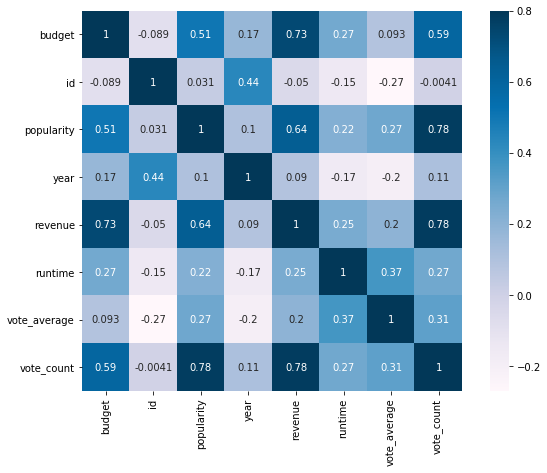

In [85]:
corrmat = movie_merge.corr()
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corrmat,cbar=True, annot=True,vmax=.8, cmap='PuBu',square=True)

因为revenue和budget的相关系数高达0.73，可以用这两个变量进行回归，然后对budget为零处进行补全_____想多了revenue和budget好多都是同时为零的

In [108]:
movie_merge.to_csv('movie_merge.csv',index=False,  header=True)